In [1]:
import cv2
import matplotlib.pyplot as plt
import os

## train.json

In [2]:
import json

with open("datasets/train.json", "r") as st_json:
    data = json.load(st_json)

train/60.png
W = 640, H = 345


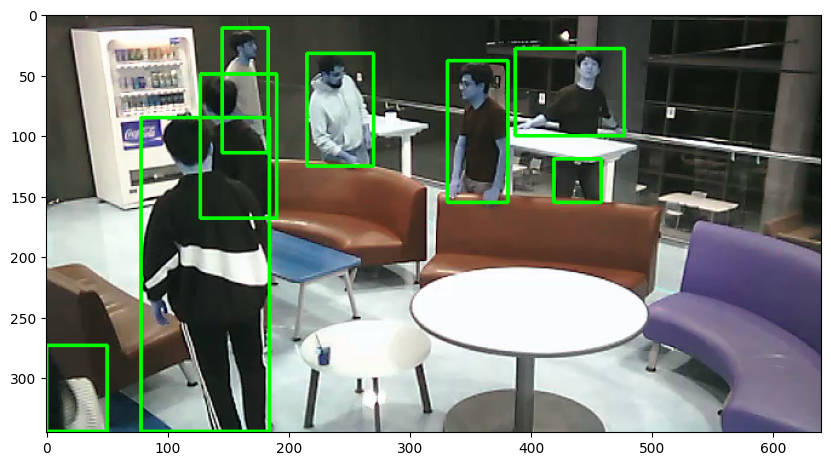

In [3]:
imgs = data['images']
number = 60
file_name = imgs[number]['file_name']
print(file_name)
file_name = f'./datasets/{file_name}'

image = cv2.imread(file_name)
H, W , _ = image.shape
print(f"W = {W}, H = {H}")

anno = data['annotations']
anno_0 = []
for a in anno:
    if a['image_id']==number:
        anno_0.append(a)


for a in anno_0:
    bbox = a['bbox']
    x, y, w, h = bbox
    
    x_end = x+w
    y_end = y+h
    
    # bounding box 그리기
    cv2.rectangle(image, (x, y), (x_end, y_end), (0, 255, 0), 2)  # (0, 255, 0)은 색상, 2는 선의 두께

# 이미지 보여주기
plt.figure(figsize=(10,10))
plt.imshow(image)
    

## For yolo format

In [6]:
img_path = 'datasets/yolo_dataset/images/val/124.png'
label_path = img_path.replace('images','labels').replace('png', 'txt')

image shape: (345, 640, 3)
['2 0.184375 0.639130 0.140625 0.721739\n', '4 0.392969 0.443478 0.057813 0.104348\n', '4 0.330469 0.628986 0.082812 0.168116\n', '4 0.311719 0.827536 0.048438 0.252174\n', '1 0.130469 0.602899 0.051562 0.371014\n', '1 0.182812 0.286957 0.046875 0.081159\n', '1 0.228906 0.471014 0.042188 0.194203\n']
2 0.184375 0.639130 0.140625 0.721739
73 95 163 344
4 0.392969 0.443478 0.057813 0.104348
233 134 270 170
4 0.330469 0.628986 0.082812 0.168116
185 188 238 246
4 0.311719 0.827536 0.048438 0.252174
184 241 215 328
1 0.130469 0.602899 0.051562 0.371014
67 144 100 272
1 0.182812 0.286957 0.046875 0.081159
101 85 131 113
1 0.228906 0.471014 0.042188 0.194203
132 128 160 195


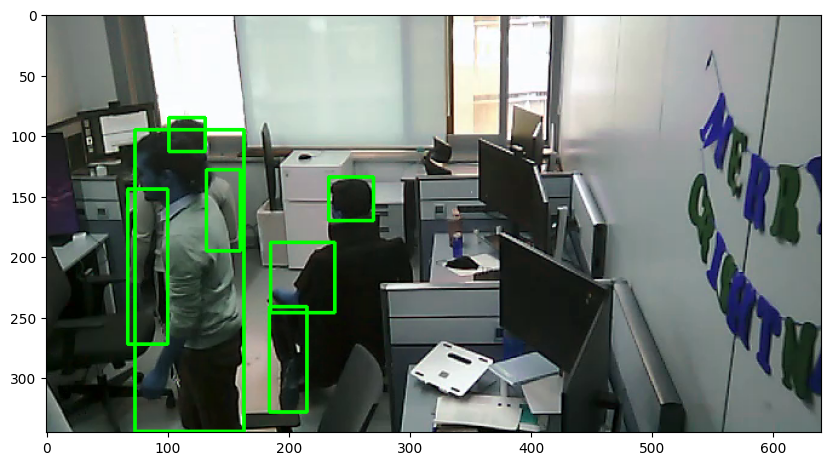

In [7]:

# 이미지 로드
image = cv2.imread(img_path)
H, W, _ = image.shape
print(f"image shape: {image.shape}")

# bounding box 좌표
f = open(label_path, 'r')     # mode = 부분은 생략해도 됨
lines = f.readlines()
print(lines)

for line in lines:
    line = line.strip()
    c, x_c, y_c, w, h = line.split(" ")
    print(c,x_c,y_c,w,h)
    
    x_c = float(x_c)
    y_c = float(y_c)
    w = float(w)
    h = float(h)
    
    x = int(W* (x_c - w/2) )
    y = int(H* (y_c - h/2))
    x_end = int(W*(x_c + w/2))
    y_end = int(H*(y_c + h/2))

    print(x,y, x_end, y_end)
    # bounding box 그리기
    cv2.rectangle(image, (x, y), (x_end, y_end), (0, 255, 0), 2)  # (0, 255, 0)은 색상, 2는 선의 두께

# 이미지 보여주기
plt.figure(figsize=(10,10))
plt.imshow(image)